### Imports

In [506]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
import glob
from oak_cli.utils.logging import logger
from oak_cli.evaluation.localhost_resources.common import CSV_DIR, ExperimentCSVKeys
from oak_cli.evaluation.localhost_resources.graph_utils import CPU_AND_MEMORY_KEYS, get_experiment_duration_label, apply_rolling_window

from oak_cli.evaluation.auxiliary import get_csv_file_path

### Settings

In [507]:
USE_MINUTES = True

USE_ROLLING_WINDOW = False
ROLLING_WINDOW_SIZE = 10
USE_MEAN = True # Otherwise Median will be used

### Error Handing & Checking

In [508]:
if not CSV_DIR.exists():
    logger.error(f"{CSV_DIR} does not exist yet!")
    sys.exit(1)

### Common Graph Configuration

In [509]:
# List all CSV files in the directory
csv_files = glob.glob(f'{CSV_DIR}/*.csv')

# Read and concatenate all CSV files into a single DataFrame
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

df.set_index(ExperimentCSVKeys.TIME_SINCE_START.value, inplace=True)

if USE_MINUTES:
    df.index = df.index / 60

### Common Graph Styling

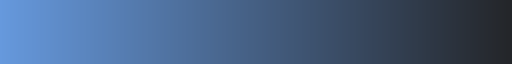

In [510]:
sns.set_style("whitegrid")
sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Graphs Drawing

### CPU & Memory

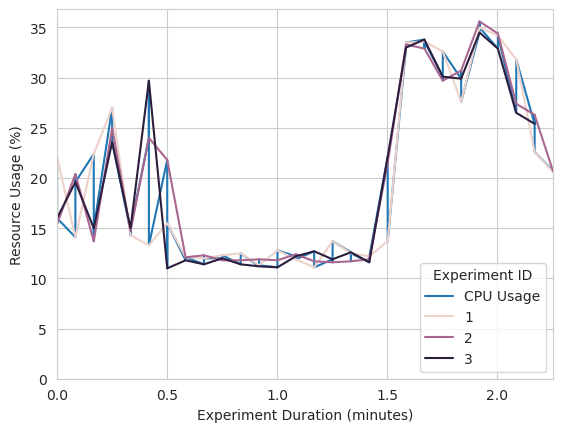

In [511]:
if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=CPU_AND_MEMORY_KEYS)

#sns.lineplot(data=df[CPU_AND_MEMORY_KEYS])

sns.lineplot(data=df[[ExperimentCSVKeys.CPU_USAGE.value]])
#sns.lineplot(data=df[[ExperimentCSVKeys.CPU_USAGE.value, ExperimentCSVKeys.MEMORY_USAGE.value, ExperimentCSVKeys.EXPERIMENT_ID.value]], hue=ExperimentCSVKeys.EXPERIMENT_ID.value)
#sns.lineplot(data=df, hue=ExperimentCSVKeys.EXPERIMENT_ID.value)

palette = sns.color_palette("hls", 10) # WTF not working !! - tooo bright!!

sns.lineplot(x=ExperimentCSVKeys.TIME_SINCE_START.value, y=ExperimentCSVKeys.CPU_USAGE.value, data=df, hue=ExperimentCSVKeys.EXPERIMENT_ID.value)

#sns.jointplot(x=ExperimentCSVKeys.TIME_SINCE_START.value, y=ExperimentCSVKeys.CPU_USAGE.value, data=df, hue=ExperimentCSVKeys.EXPERIMENT_ID.value)

#sns.scatterplot(x=ExperimentCSVKeys.TIME_SINCE_START.value, y=ExperimentCSVKeys.CPU_USAGE.value, hue=ExperimentCSVKeys.EXPERIMENT_ID.value, data=df)
#sns.scatterplot(x=ExperimentCSVKeys.TIME_SINCE_START.value, y=ExperimentCSVKeys.CPU_USAGE.value, data=df)

#plt.figure(figsize=(10, 6)) 
#sns.boxplot(x=ExperimentCSVKeys.EXPERIMENT_ID.value, y=ExperimentCSVKeys.CPU_USAGE.value, data=df)

plt.xlabel(get_experiment_duration_label())
plt.ylabel("Resource Usage (%)")

plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Disk Space Changes

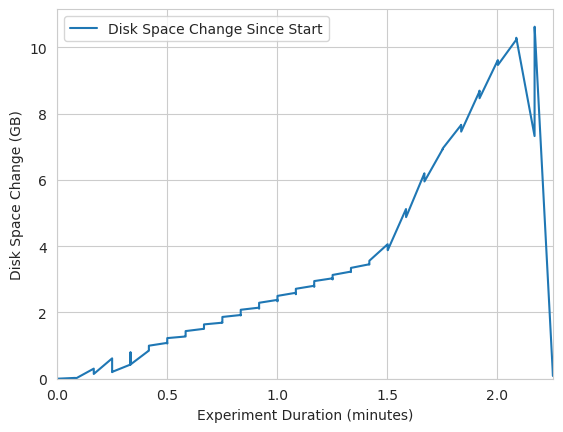

In [512]:
disk_space_key = ExperimentCSVKeys.DISK_SPACE_CHANGE_SINCE_START.value

if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=[disk_space_key])

# Note: Change MB to GB
df[[disk_space_key]] = df[[disk_space_key]] / 1024
sns.lineplot(data=df[[disk_space_key]])
plt.xlabel(get_experiment_duration_label())
plt.ylabel("Disk Space Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

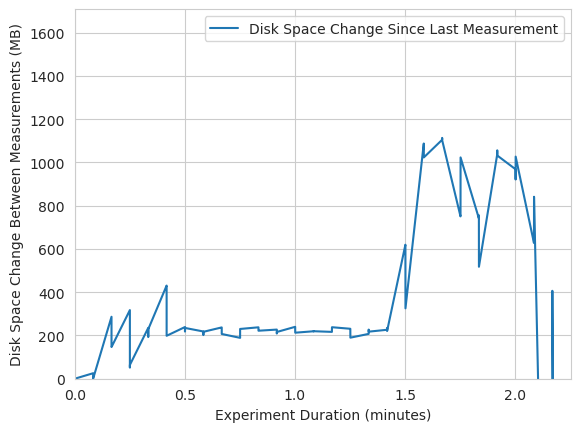

In [513]:
disk_space_key = ExperimentCSVKeys.DISK_SPACE_CHANGE_SINCE_LAST_MEASUREMENT.value

if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=[disk_space_key])

# Note: Change MB to GB
df[[disk_space_key]] = df[[disk_space_key]]
sns.lineplot(data=df[[disk_space_key]])
plt.xlabel(get_experiment_duration_label())
plt.ylabel("Disk Space Change Between Measurements (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

### Network

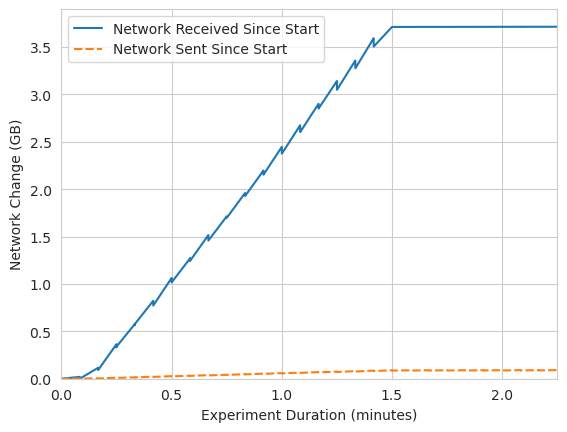

In [514]:
NETWORK_COMPARED_TO_START_KEYS = [ExperimentCSVKeys.NETWORK_RECEIVED_SINCE_START.value, ExperimentCSVKeys.NETWORK_SENT_SINCE_START.value]


if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=NETWORK_COMPARED_TO_START_KEYS)

sns.lineplot(data=df[NETWORK_COMPARED_TO_START_KEYS] / 1024)
plt.xlabel(get_experiment_duration_label())
plt.ylabel("Network Change (GB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()

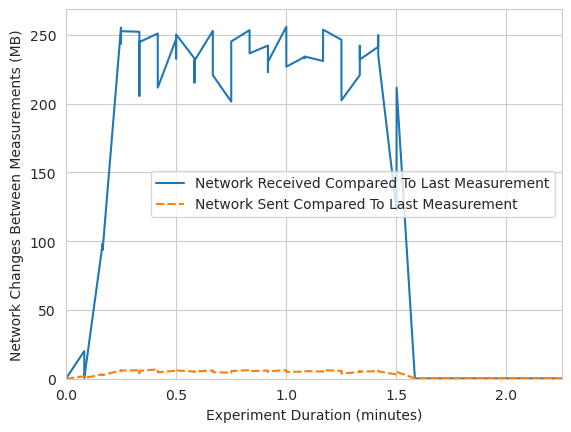

In [515]:
NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS = [ExperimentCSVKeys.NETWORK_RECEIVED_COMPARED_TO_LAST_MEASUREMENT.value, ExperimentCSVKeys.NETWORK_SENT_COMPARED_TO_LAST_MEASUREMENT.value]


if USE_ROLLING_WINDOW:
    apply_rolling_window(df=df, keys=NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS)

sns.lineplot(data=df[NETWORK_COMPARED_TO_LAST_MEASUREMENT_KEYS])
plt.xlabel(get_experiment_duration_label())
plt.ylabel("Network Changes Between Measurements (MB)")

# Constrain axes e.g. start at 0
plt.xlim([0, max(df.index)])
plt.ylim(0)

plt.show()